In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.cluster import KMeans


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [174]:
df = pd.read_csv("IKP_percent_only.csv")

In [175]:
df

,Desa/Kelurahan,I.2.1.1,I.3.1.1,I.4.1.1,II.1.1.2,II.1.2.3,II.1.3.1,II.3.3.2
0,Balauring,91.666667,0.000000,100.000000,8.333333,50.000000,25.000000,33.333333
1,Benihading,90.000000,3.333333,76.666667,10.000000,100.000000,100.000000,13.333333
2,Bour,70.588235,11.764706,70.588235,82.352941,58.823529,83.333333,58.823529
3,Dikesare,22.222222,0.000000,63.888889,0.000000,100.000000,NaN,22.222222
4,Duawutun,80.000000,0.000000,55.000000,0.000000,100.000000,NaN,70.000000
5,Dulitukan,36.363636,0.000000,95.454545,0.000000,100.000000,NaN,4.545455
6,Hoelea I,96.428571,0.000000,91.071429,60.714286,14.285714,0.000000,28.571429
7,Ile Kimok,93.103448,0.000000,100.000000,55.172414,93.103448,33.333333,37.931034
8,Kalikur,69.230769,0.000000,80.769231,84.615385,0.000000,9.090909,38.461538
9,Katakeja,7.692308,0.000000,3.846154,53.846154,100.000000,25.000000,7.692308


In [176]:
df = df.rename(columns={
    "I.1.1.1": "Rasio Gini Tanah",
    "I.2.1.1": "Luas Tanah yang Dikuasai",
    "I.3.1.1": "Ketersediaan Air untuk Budidaya",
    "I.4.1.1": "Asal Benih",
    "II.1.1.2": "Pengadaan Pestisida",
    "II.1.2.3": "Pengadaan Pupuk",
    "II.1.3.1": "Melakukan pemanfaatan limbah pertanian",
    "II.2.2.1": "Keragaman Jenis Tanaman",
    "II.3.3.1": "Nilai Tukar Petani",
    "II.3.3.2": "Rasio rerata penghasilan dengan UMK",
    "III.1.1.1": "Pola Pangan Harapan (PPH)",
    "III.1.1.2": "Indeks Shanon Weiner",
    "III.1.2.1": "Asal Bahan Baku",
    "III.1.4.1": "Daya dukung pangan"
})

In [177]:
df.isna().sum()

Desa/Kelurahan                             0
Luas Tanah yang Dikuasai                   0
Ketersediaan Air untuk Budidaya            0
Asal Benih                                 0
Pengadaan Pestisida                        0
Pengadaan Pupuk                            0
Melakukan pemanfaatan limbah pertanian    11
Rasio rerata penghasilan dengan UMK        0
dtype: int64

In [178]:
df["Melakukan pemanfaatan limbah pertanian"] = df["Melakukan pemanfaatan limbah pertanian"].fillna(0)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Desa/Kelurahan                          29 non-null     object 
 1   Luas Tanah yang Dikuasai                29 non-null     float64
 2   Ketersediaan Air untuk Budidaya         29 non-null     float64
 3   Asal Benih                              29 non-null     float64
 4   Pengadaan Pestisida                     29 non-null     float64
 5   Pengadaan Pupuk                         29 non-null     float64
 6   Melakukan pemanfaatan limbah pertanian  29 non-null     float64
 7   Rasio rerata penghasilan dengan UMK     29 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.9+ KB


In [180]:
df

,Desa/Kelurahan,Luas Tanah yang Dikuasai,Ketersediaan Air untuk Budidaya,Asal Benih,Pengadaan Pestisida,Pengadaan Pupuk,Melakukan pemanfaatan limbah pertanian,Rasio rerata penghasilan dengan UMK
0,Balauring,91.666667,0.000000,100.000000,8.333333,50.000000,25.000000,33.333333
1,Benihading,90.000000,3.333333,76.666667,10.000000,100.000000,100.000000,13.333333
2,Bour,70.588235,11.764706,70.588235,82.352941,58.823529,83.333333,58.823529
3,Dikesare,22.222222,0.000000,63.888889,0.000000,100.000000,0.000000,22.222222
4,Duawutun,80.000000,0.000000,55.000000,0.000000,100.000000,0.000000,70.000000
5,Dulitukan,36.363636,0.000000,95.454545,0.000000,100.000000,0.000000,4.545455
6,Hoelea I,96.428571,0.000000,91.071429,60.714286,14.285714,0.000000,28.571429
7,Ile Kimok,93.103448,0.000000,100.000000,55.172414,93.103448,33.333333,37.931034
8,Kalikur,69.230769,0.000000,80.769231,84.615385,0.000000,9.090909,38.461538
9,Katakeja,7.692308,0.000000,3.846154,53.846154,100.000000,25.000000,7.692308


### analisis distribusi

In [181]:
#memisahkan data numerik dan kategorik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [182]:
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Luas Tanah yang Dikuasai,29.0,63.272947,25.985539,7.692308,41.666667,69.230769,80.000000,100.000000
Ketersediaan Air untuk Budidaya,29.0,1.970847,5.521747,0.000000,0.000000,0.000000,0.000000,26.315789
Asal Benih,29.0,75.961068,23.676014,3.846154,63.888889,83.333333,91.071429,100.000000
Pengadaan Pestisida,29.0,31.030217,30.428659,0.000000,0.000000,28.000000,52.173913,91.304348
Pengadaan Pupuk,29.0,82.781849,28.959602,0.000000,84.210526,95.652174,100.000000,100.000000
Melakukan pemanfaatan limbah pertanian,29.0,24.078795,32.821831,0.000000,0.000000,0.000000,50.000000,100.000000
Rasio rerata penghasilan dengan UMK,29.0,32.706153,22.392992,0.000000,18.750000,26.923077,45.000000,100.000000


In [183]:
cols = 3
rows = math.ceil(len(numerical_cols) / cols)

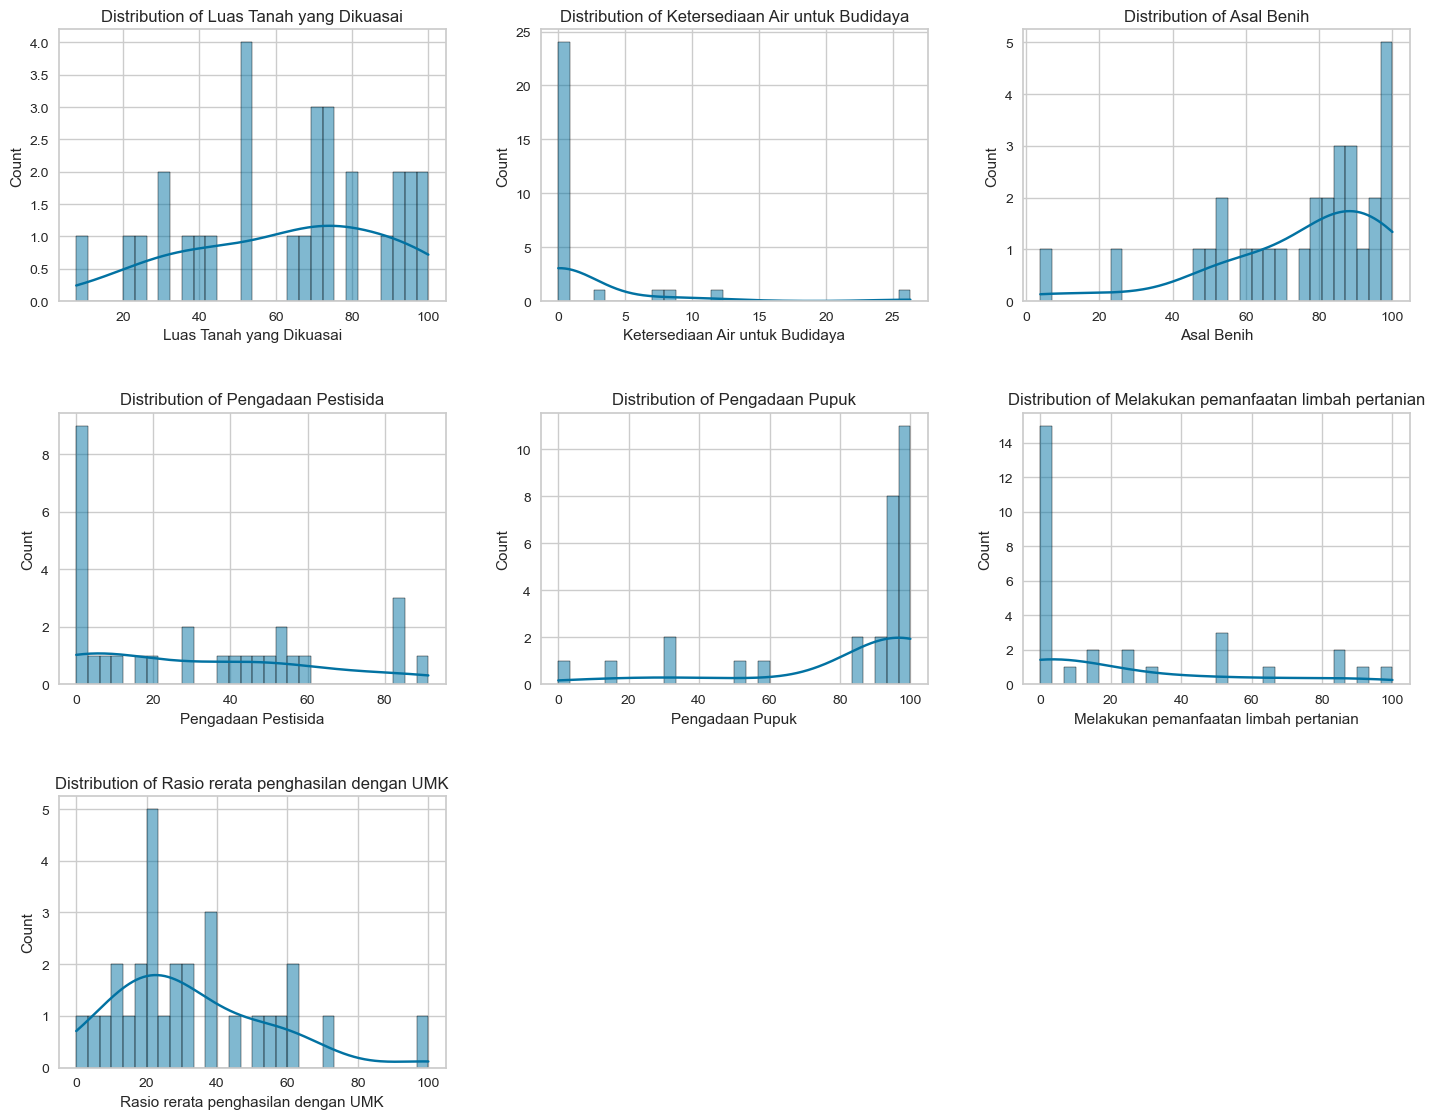

In [184]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# hapus subplot kosong
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

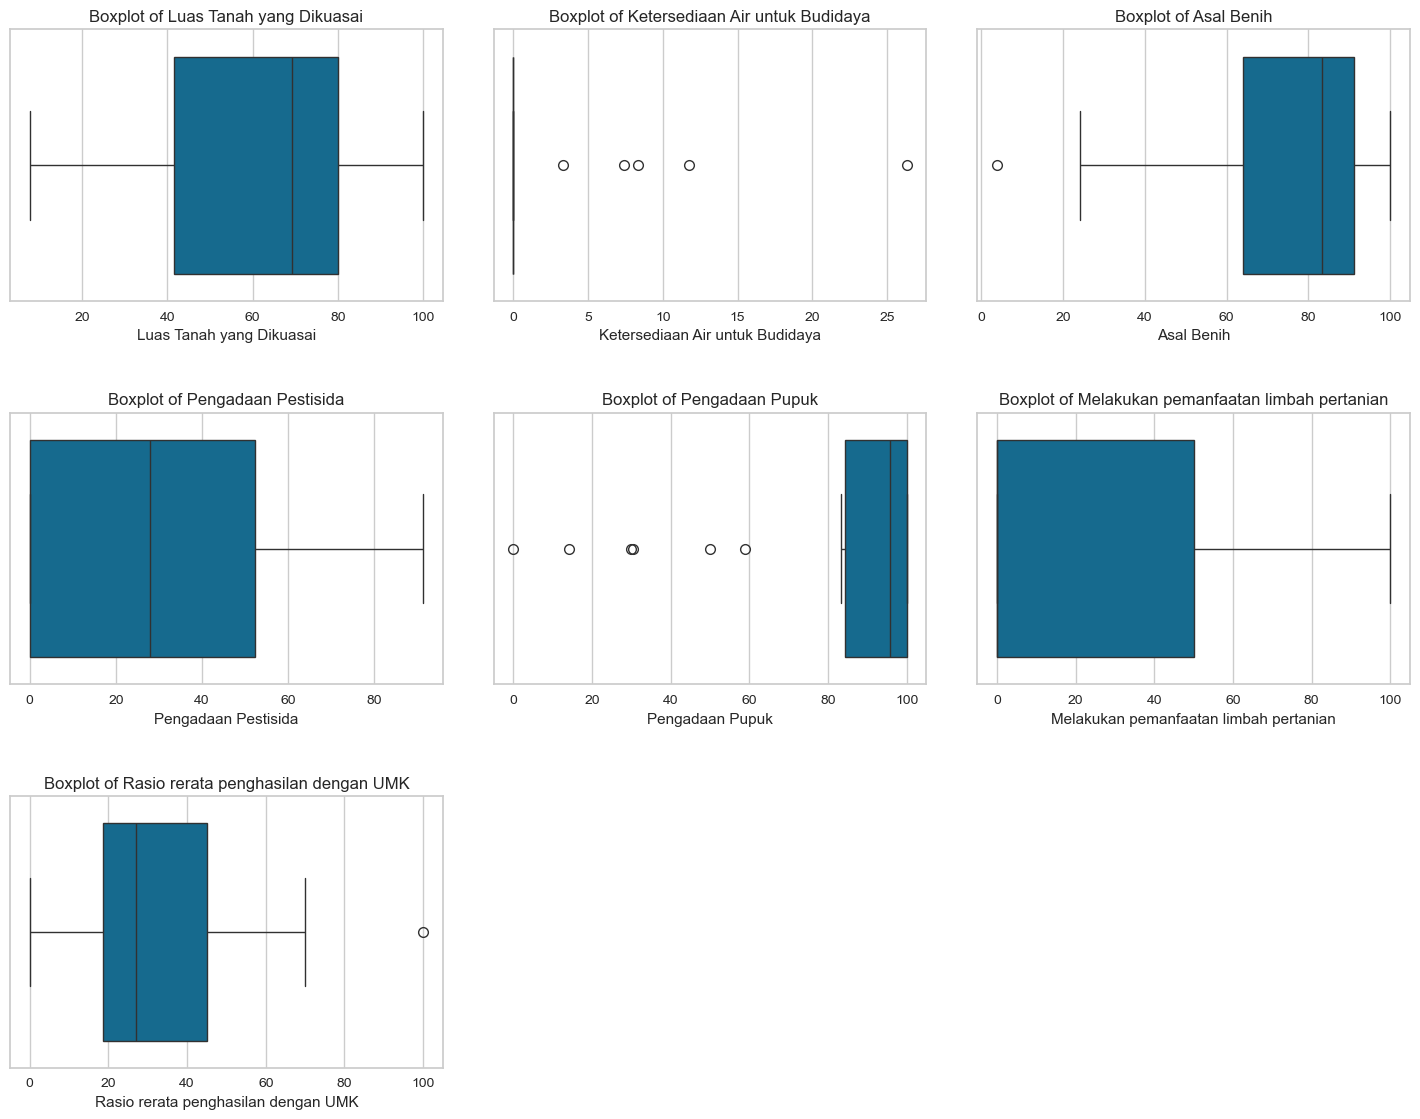

In [185]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# hapus subplot kosong (kalau ada)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

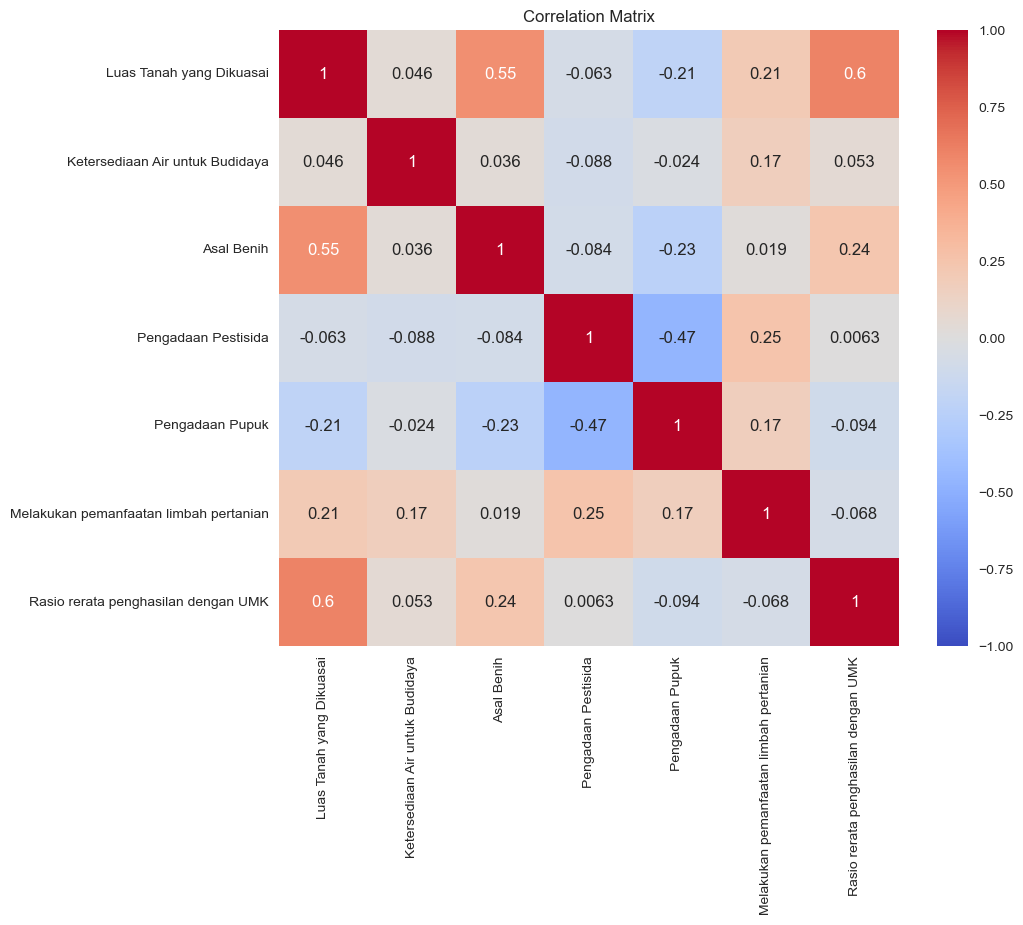

In [186]:
plt.figure(figsize=(10,8))
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

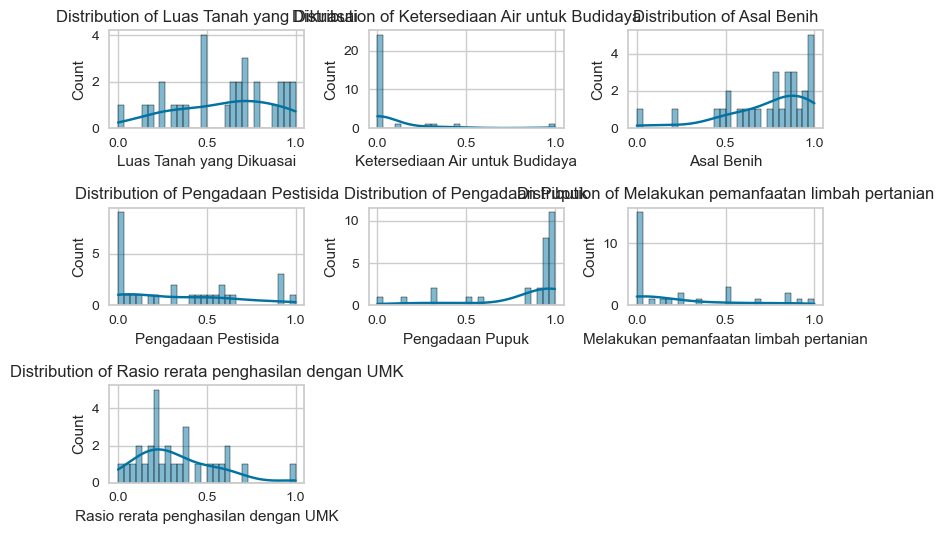

In [187]:
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df_normalized[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [188]:
df_normalized

,Desa/Kelurahan,Luas Tanah yang Dikuasai,Ketersediaan Air untuk Budidaya,Asal Benih,Pengadaan Pestisida,Pengadaan Pupuk,Melakukan pemanfaatan limbah pertanian,Rasio rerata penghasilan dengan UMK
0,Balauring,0.909722,0.000000,1.000000,0.091270,0.500000,0.250000,0.333333
1,Benihading,0.891667,0.126667,0.757333,0.109524,1.000000,1.000000,0.133333
2,Bour,0.681373,0.447059,0.694118,0.901961,0.588235,0.833333,0.588235
3,Dikesare,0.157407,0.000000,0.624444,0.000000,1.000000,0.000000,0.222222
4,Duawutun,0.783333,0.000000,0.532000,0.000000,1.000000,0.000000,0.700000
5,Dulitukan,0.310606,0.000000,0.952727,0.000000,1.000000,0.000000,0.045455
6,Hoelea I,0.961310,0.000000,0.907143,0.664966,0.142857,0.000000,0.285714
7,Ile Kimok,0.925287,0.000000,1.000000,0.604269,0.931034,0.333333,0.379310
8,Kalikur,0.666667,0.000000,0.800000,0.926740,0.000000,0.090909,0.384615
9,Katakeja,0.000000,0.000000,0.000000,0.589744,1.000000,0.250000,0.076923


In [189]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Desa/Kelurahan                          29 non-null     object 
 1   Luas Tanah yang Dikuasai                29 non-null     float64
 2   Ketersediaan Air untuk Budidaya         29 non-null     float64
 3   Asal Benih                              29 non-null     float64
 4   Pengadaan Pestisida                     29 non-null     float64
 5   Pengadaan Pupuk                         29 non-null     float64
 6   Melakukan pemanfaatan limbah pertanian  29 non-null     float64
 7   Rasio rerata penghasilan dengan UMK     29 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.9+ KB


In [190]:
df_normalized_num = df_normalized.select_dtypes(include=['number'])

In [191]:
df_normalized_num

,Luas Tanah yang Dikuasai,Ketersediaan Air untuk Budidaya,Asal Benih,Pengadaan Pestisida,Pengadaan Pupuk,Melakukan pemanfaatan limbah pertanian,Rasio rerata penghasilan dengan UMK
0,0.909722,0.000000,1.000000,0.091270,0.500000,0.250000,0.333333
1,0.891667,0.126667,0.757333,0.109524,1.000000,1.000000,0.133333
2,0.681373,0.447059,0.694118,0.901961,0.588235,0.833333,0.588235
3,0.157407,0.000000,0.624444,0.000000,1.000000,0.000000,0.222222
4,0.783333,0.000000,0.532000,0.000000,1.000000,0.000000,0.700000
5,0.310606,0.000000,0.952727,0.000000,1.000000,0.000000,0.045455
6,0.961310,0.000000,0.907143,0.664966,0.142857,0.000000,0.285714
7,0.925287,0.000000,1.000000,0.604269,0.931034,0.333333,0.379310
8,0.666667,0.000000,0.800000,0.926740,0.000000,0.090909,0.384615
9,0.000000,0.000000,0.000000,0.589744,1.000000,0.250000,0.076923


In [192]:
df_normalized_num = df_normalized.copy()

In [193]:
df_normalized_num = df_normalized_num.drop("Desa/Kelurahan", axis=1)

In [194]:
df_normalized_num

,Luas Tanah yang Dikuasai,Ketersediaan Air untuk Budidaya,Asal Benih,Pengadaan Pestisida,Pengadaan Pupuk,Melakukan pemanfaatan limbah pertanian,Rasio rerata penghasilan dengan UMK
0,0.909722,0.000000,1.000000,0.091270,0.500000,0.250000,0.333333
1,0.891667,0.126667,0.757333,0.109524,1.000000,1.000000,0.133333
2,0.681373,0.447059,0.694118,0.901961,0.588235,0.833333,0.588235
3,0.157407,0.000000,0.624444,0.000000,1.000000,0.000000,0.222222
4,0.783333,0.000000,0.532000,0.000000,1.000000,0.000000,0.700000
5,0.310606,0.000000,0.952727,0.000000,1.000000,0.000000,0.045455
6,0.961310,0.000000,0.907143,0.664966,0.142857,0.000000,0.285714
7,0.925287,0.000000,1.000000,0.604269,0.931034,0.333333,0.379310
8,0.666667,0.000000,0.800000,0.926740,0.000000,0.090909,0.384615
9,0.000000,0.000000,0.000000,0.589744,1.000000,0.250000,0.076923


In [195]:
df_normalized_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Luas Tanah yang Dikuasai                29 non-null     float64
 1   Ketersediaan Air untuk Budidaya         29 non-null     float64
 2   Asal Benih                              29 non-null     float64
 3   Pengadaan Pestisida                     29 non-null     float64
 4   Pengadaan Pupuk                         29 non-null     float64
 5   Melakukan pemanfaatan limbah pertanian  29 non-null     float64
 6   Rasio rerata penghasilan dengan UMK     29 non-null     float64
dtypes: float64(7)
memory usage: 1.7 KB


### pembangunan model clustering

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

<function matplotlib.pyplot.show(close=None, block=None)>

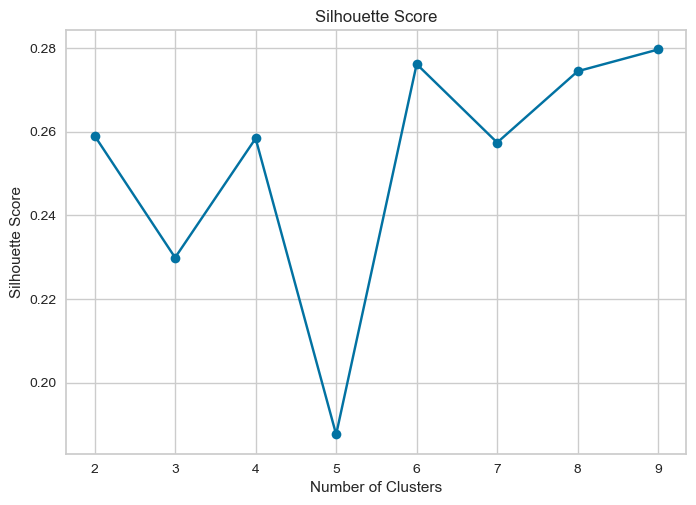

In [196]:
silhouette_scores = []
for i in range(2, 10):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        random_state=42
    )
    kmeans.fit(df_normalized_num)
    silhouette_scores.append(silhouette_score(df_normalized_num, kmeans.labels_))

plt.plot(range(2,10), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show

In [197]:
# melatih model

model_kmeans = KMeans (
    n_clusters=4,
    init='k-means++',
    random_state=42
)
model_kmeans.fit(df_normalized_num)
silhouette_score(df_normalized_num, model_kmeans.labels_)

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.2583857731528431

### visualisasi hasil clustering

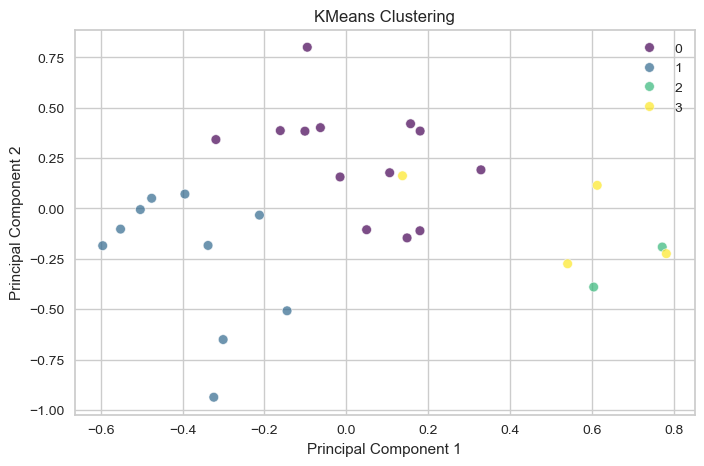

In [198]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized_num)

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=model_kmeans.labels_, palette='viridis', alpha=0.7)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [199]:
df_normalized_num['cluster'] = model_kmeans.labels_

In [200]:
df_normalized['cluster'] = df_normalized_num['cluster']

In [201]:
df_normalized

,Desa/Kelurahan,Luas Tanah yang Dikuasai,Ketersediaan Air untuk Budidaya,Asal Benih,Pengadaan Pestisida,Pengadaan Pupuk,Melakukan pemanfaatan limbah pertanian,Rasio rerata penghasilan dengan UMK,cluster
0,Balauring,0.909722,0.000000,1.000000,0.091270,0.500000,0.250000,0.333333,0
1,Benihading,0.891667,0.126667,0.757333,0.109524,1.000000,1.000000,0.133333,0
2,Bour,0.681373,0.447059,0.694118,0.901961,0.588235,0.833333,0.588235,2
3,Dikesare,0.157407,0.000000,0.624444,0.000000,1.000000,0.000000,0.222222,1
4,Duawutun,0.783333,0.000000,0.532000,0.000000,1.000000,0.000000,0.700000,0
5,Dulitukan,0.310606,0.000000,0.952727,0.000000,1.000000,0.000000,0.045455,1
6,Hoelea I,0.961310,0.000000,0.907143,0.664966,0.142857,0.000000,0.285714,3
7,Ile Kimok,0.925287,0.000000,1.000000,0.604269,0.931034,0.333333,0.379310,0
8,Kalikur,0.666667,0.000000,0.800000,0.926740,0.000000,0.090909,0.384615,3
9,Katakeja,0.000000,0.000000,0.000000,0.589744,1.000000,0.250000,0.076923,1


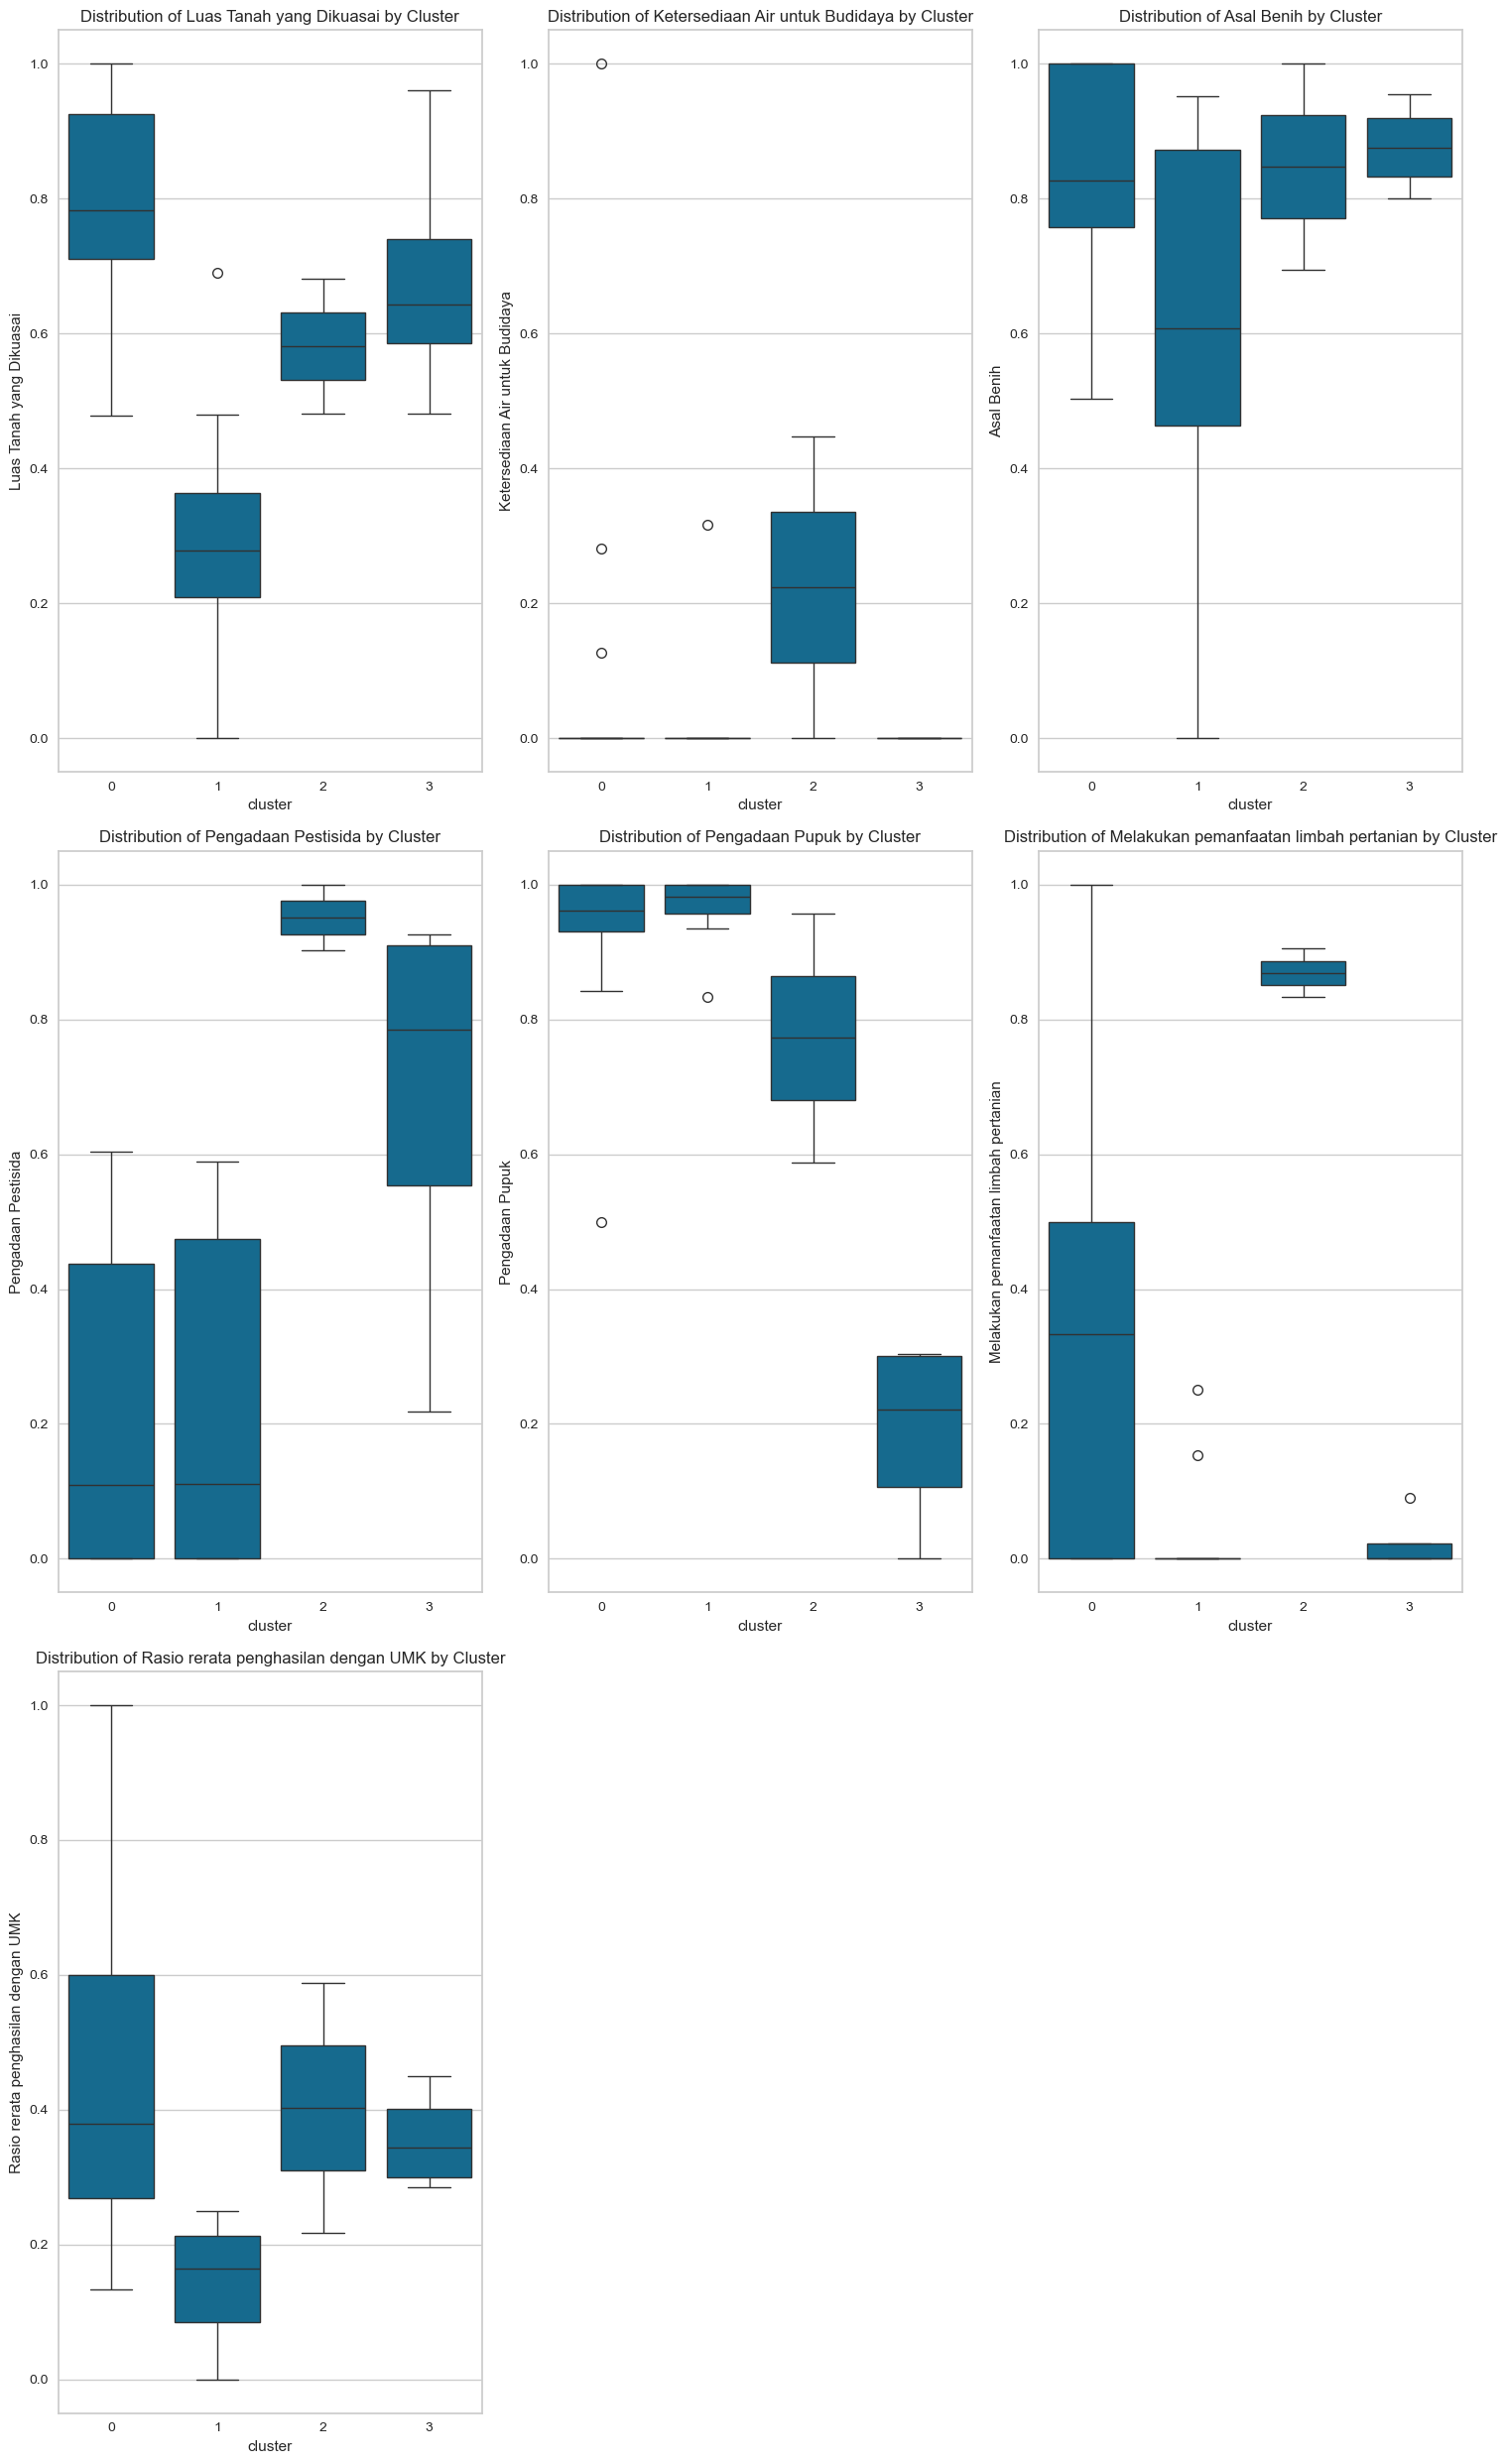

In [202]:
# variabel numerik

plt.figure(figsize=(15,25))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x='cluster', y=column, data=df_normalized)
    plt.title(f'Distribution of {column} by Cluster')

plt.tight_layout()
plt.show()

## coba hierarchical clustering

In [203]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [204]:
# Simpan nama desa terpisah
desa = df["Desa/Kelurahan"]

# Ambil hanya variabel numerik
X = df.drop("Desa/Kelurahan", axis=1)

# Tangani missing value (misalnya isi dengan median)
X = X.fillna(X.median())

# (opsional) Scaling → lebih adil antar indikator
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

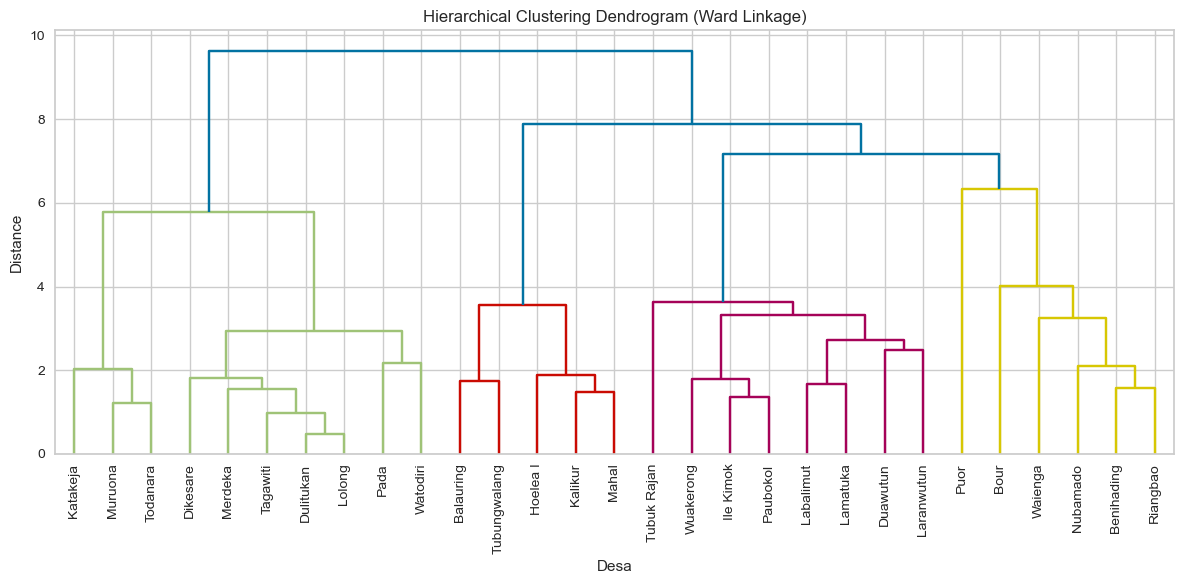

In [205]:
# linkage: 'ward' cocok untuk data numerik
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(Z, labels=desa.values, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Desa")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [206]:
clusters = fcluster(Z, 4, criterion="maxclust")

df_clusters = pd.DataFrame({
    "Desa": desa,
    "Cluster": clusters
})

print(df_clusters.sort_values("Cluster"))

            Desa  Cluster
23      Todanara        1
3       Dikesare        1
22      Tagawiti        1
5      Dulitukan        1
18          Pada        1
16       Muruona        1
15       Merdeka        1
9       Katakeja        1
27      Watodiri        1
13        Lolong        1
0      Balauring        2
25  Tubungwalang        2
14         Mahal        2
8        Kalikur        2
6       Hoelea I        2
11      Lamatuka        3
10     Labalimut        3
7      Ile Kimok        3
19      Paubokol        3
4       Duawutun        3
24   Tubuk Rajan        3
12    Laranwutun        3
28     Wuakerong        3
17      Nubamado        4
20          Puor        4
21      Riangbao        4
2           Bour        4
1     Benihading        4
26       Waienga        4


In [207]:
df_hc = df.copy()

In [208]:
df_hc['cluster'] = df_clusters['Cluster']

In [209]:
df_hc

,Desa/Kelurahan,Luas Tanah yang Dikuasai,Ketersediaan Air untuk Budidaya,Asal Benih,Pengadaan Pestisida,Pengadaan Pupuk,Melakukan pemanfaatan limbah pertanian,Rasio rerata penghasilan dengan UMK,cluster
0,Balauring,91.666667,0.000000,100.000000,8.333333,50.000000,25.000000,33.333333,2
1,Benihading,90.000000,3.333333,76.666667,10.000000,100.000000,100.000000,13.333333,4
2,Bour,70.588235,11.764706,70.588235,82.352941,58.823529,83.333333,58.823529,4
3,Dikesare,22.222222,0.000000,63.888889,0.000000,100.000000,0.000000,22.222222,1
4,Duawutun,80.000000,0.000000,55.000000,0.000000,100.000000,0.000000,70.000000,3
5,Dulitukan,36.363636,0.000000,95.454545,0.000000,100.000000,0.000000,4.545455,1
6,Hoelea I,96.428571,0.000000,91.071429,60.714286,14.285714,0.000000,28.571429,2
7,Ile Kimok,93.103448,0.000000,100.000000,55.172414,93.103448,33.333333,37.931034,3
8,Kalikur,69.230769,0.000000,80.769231,84.615385,0.000000,9.090909,38.461538,2
9,Katakeja,7.692308,0.000000,3.846154,53.846154,100.000000,25.000000,7.692308,1


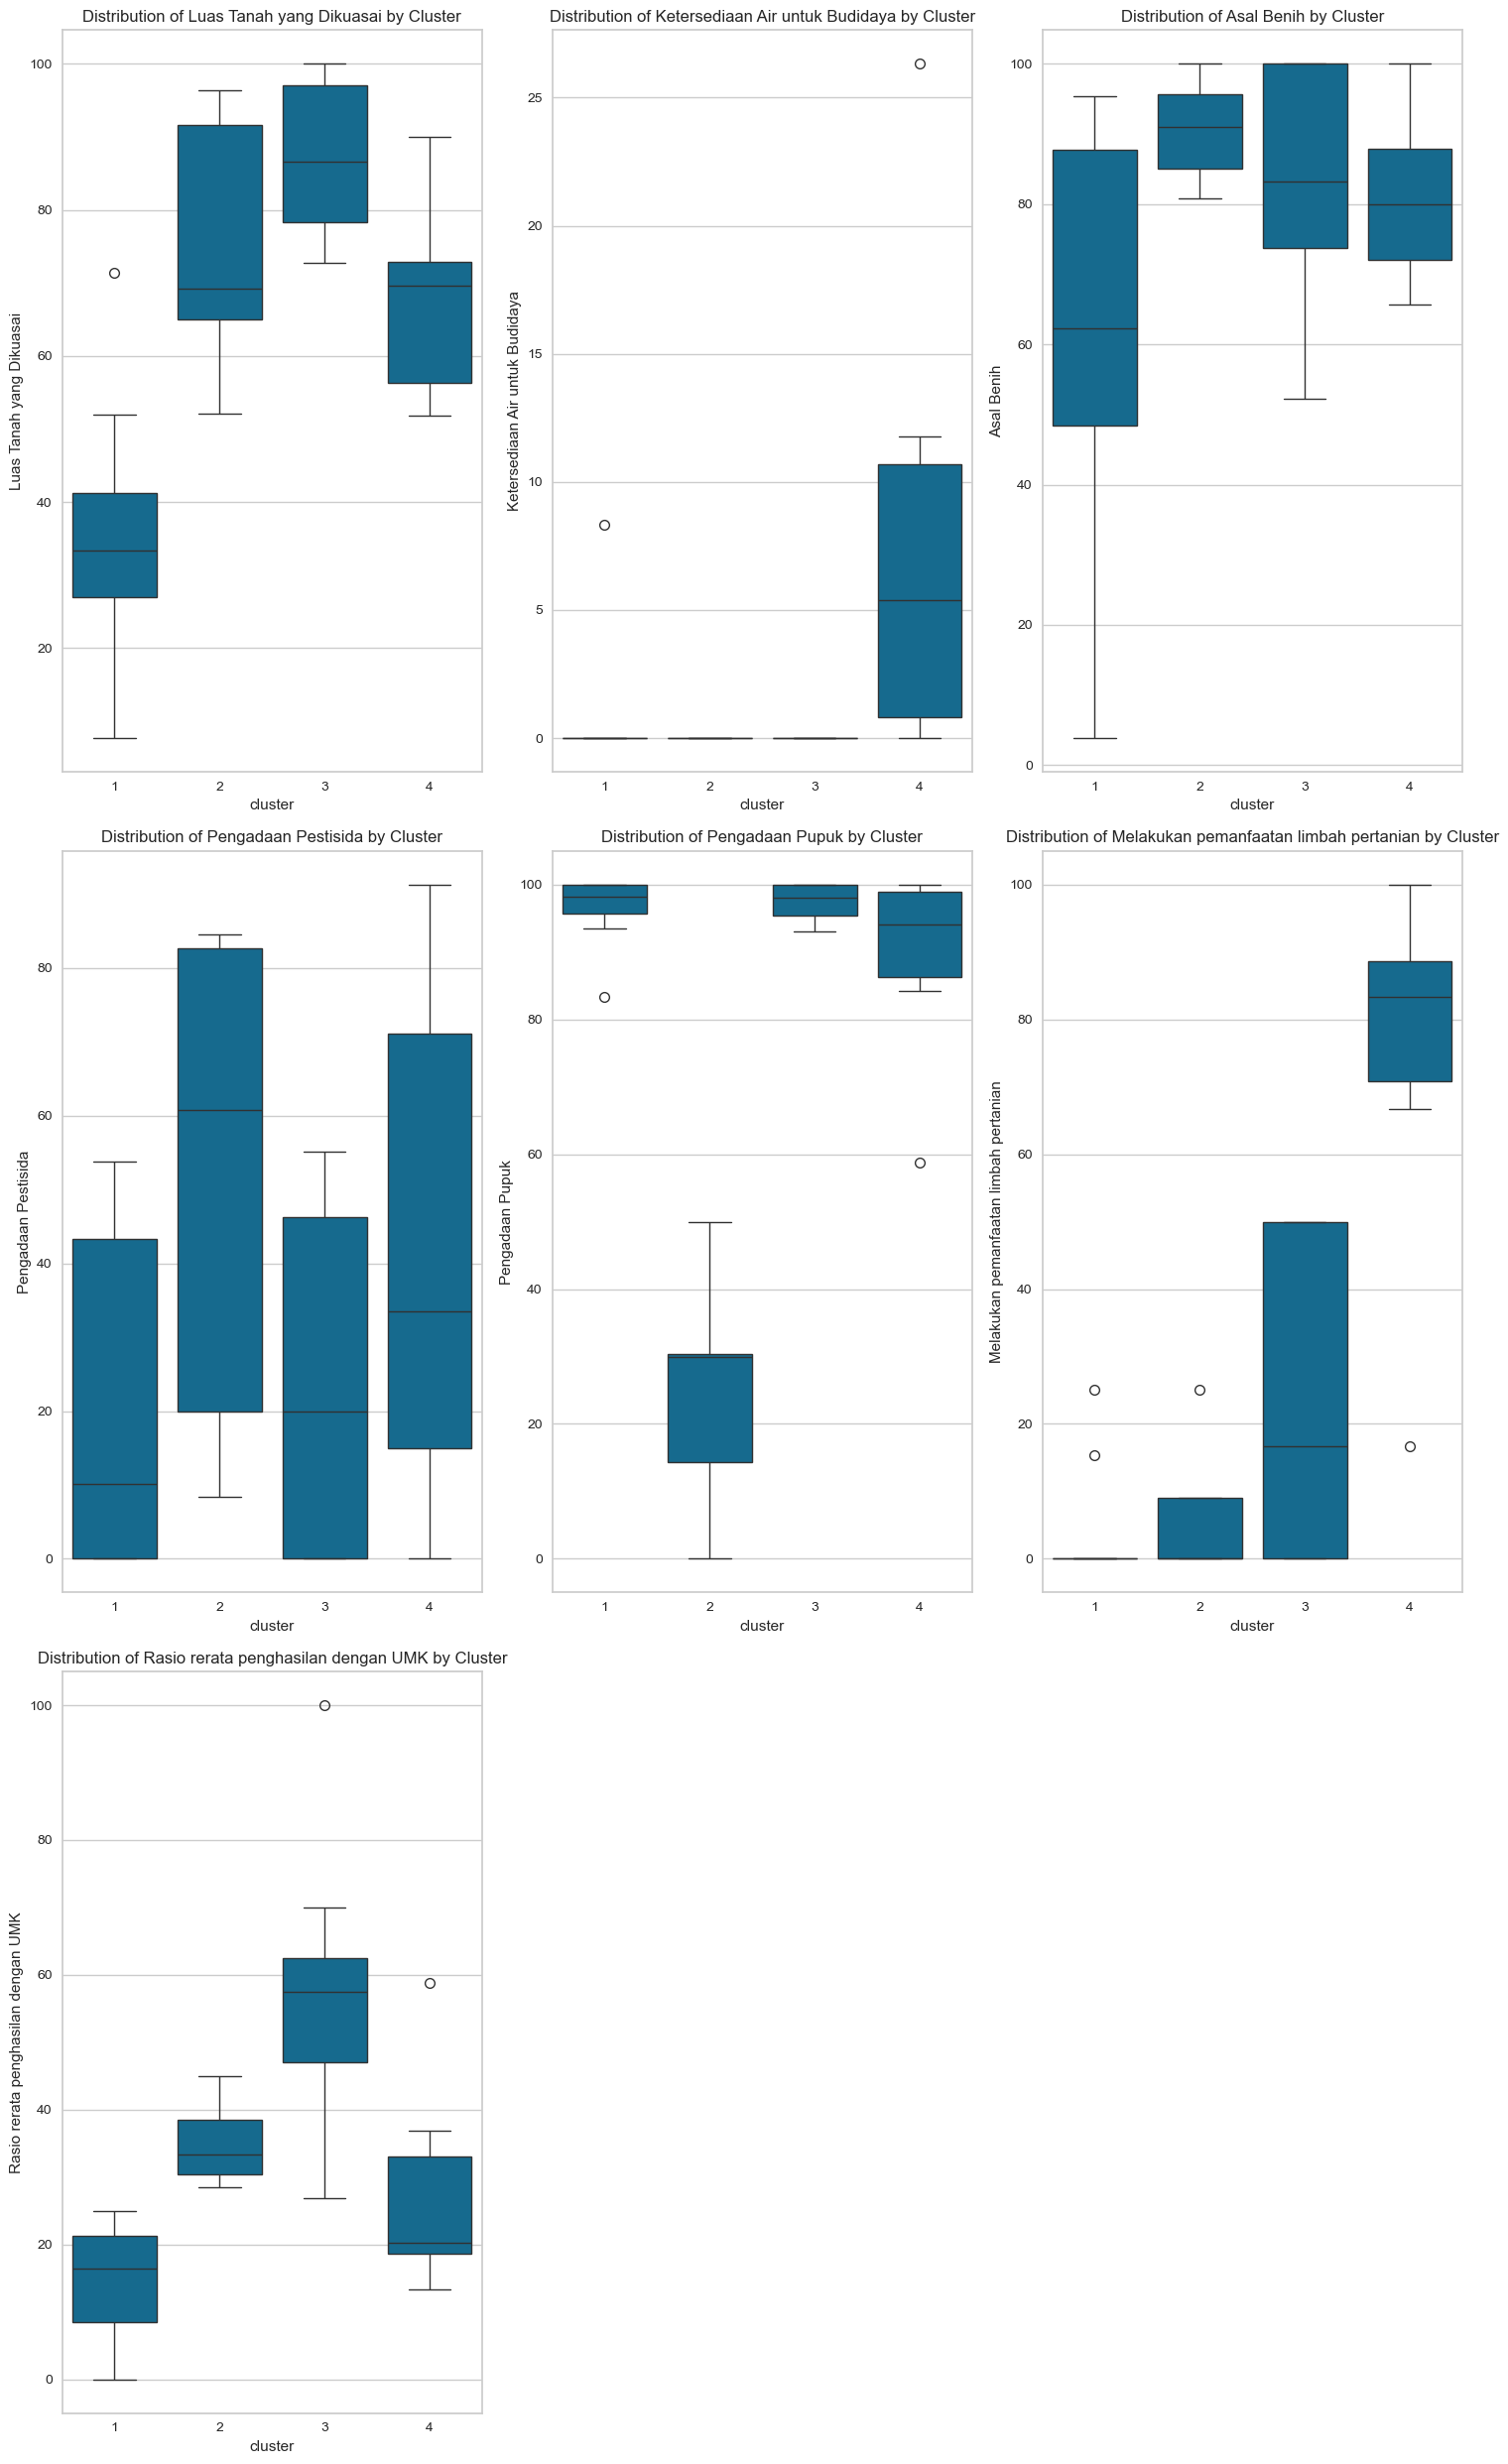

In [210]:
plt.figure(figsize=(15, 25))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x="cluster", y=column, data=df_hc)
    plt.title(f"Distribution of {column} by Cluster")

plt.tight_layout()
plt.show()


ValueError: Could not interpret value `Cluster` for `hue`. An entry with this name does not appear in `data`.

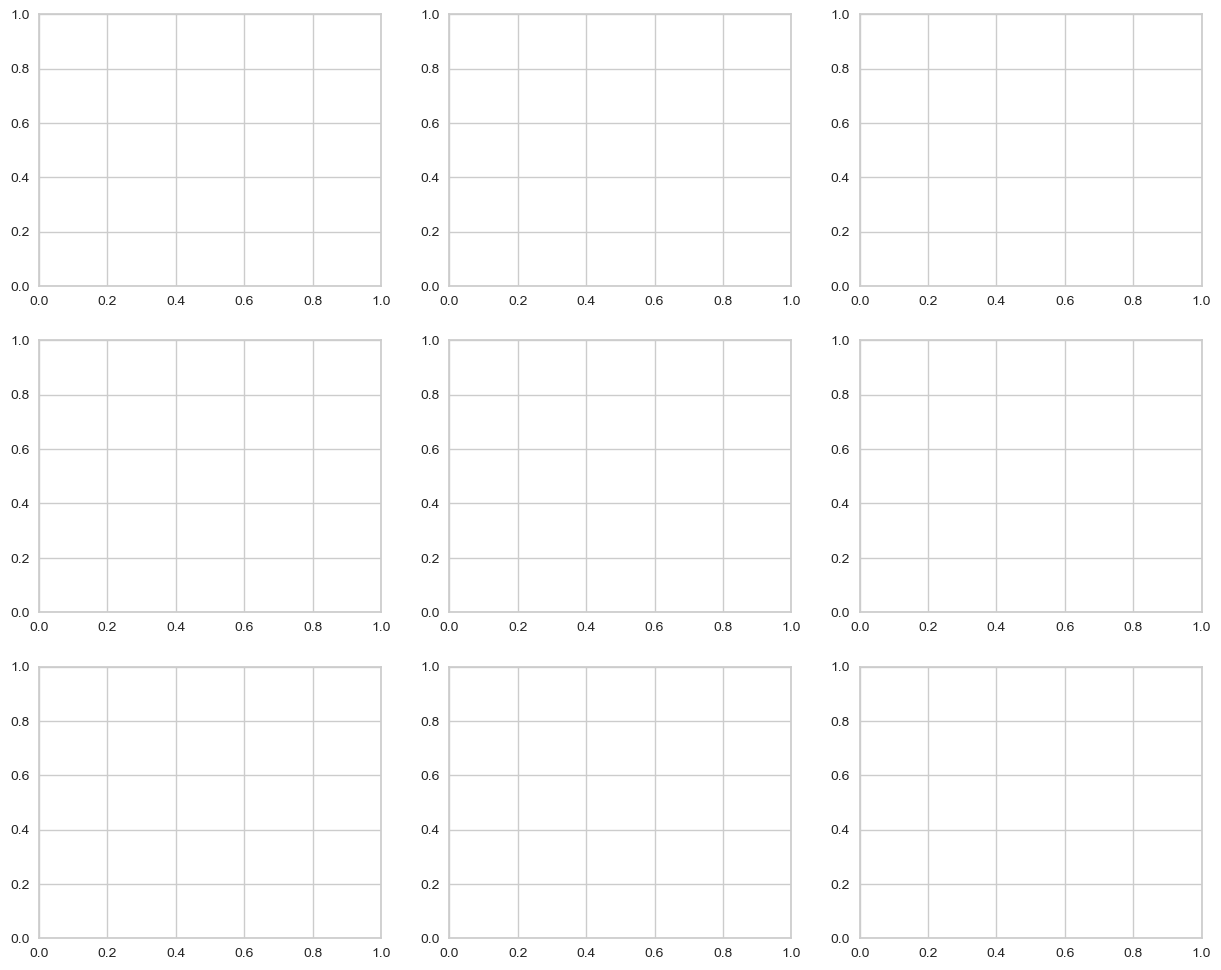

In [211]:
# Palet warna terang / pastel
palette=palette

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(
        data=df,
        x=col,
        hue="Cluster",
        bins=30,
        multiple="layer",
        stat="count",
        common_bins=True,
        alpha=0.6,         # transparansi lebih tinggi
        palette=palette,
        ax=axes[i]
    )

    sns.kdeplot(
        data=df,
        x=col,
        hue="Cluster",
        common_norm=False,
        linewidth=1.3,
        legend=False,
        palette=palette,
        ax=axes[i]
    )

    axes[i].set_title(f"Distribution of {col}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()
